In [1]:
!pip install scikit-image

# Laboratorio 6: Recuperación de Imágenes

El laboratorio tiene como objetivo implementar un SRI de imágenes. 

Se conoce que un modelo de recuperación de información es un cuádruplo [$D$, $D$, $F$, $R(q_j, d_j)$] donde:
- $D$ es un conjunto de representaciones lógicas de los datos de la colección. 
- $Q$ es un conjunto compuesto por representaciones lógicas de las necesidades del usuario, denominadas "consultas".
- $F$ es un framework para modelar las representaciones de los datos, consultas y sus relaciones.
- $R$ es una función de ranking que asocia un número real a una consulta $q \in Q$ y un documento
$d \in D$. La evaluación de esta función establece un cierto orden entre la información de acuerdo a la consulta

Para el caso particular de la clase, la tupla variaría en:
- $D$: Representación de las imágenes mediantes puntos claves y descriptores (SIFT).
- $Q$: Representación de las imágenes mediantes puntos claves y descriptores (SIFT).
- $R$: Álgebra Vectorial. Para medir la similitud entre descriptores, se calcula la distancia (generalmente la distancia euclidiana) entre cada par de descriptores.

### **SIFT**: Transformada de Características Invariantes a Escala (Scale-Invariant Feature Transform)
SIFT es un algoritmo de procesamiento de imágenes que permite detectar y describir características locales invariantes a escala y rotación; también es parcialmente invariante a cambios de iluminación y perspectiva. Esto significa que las características SIFT de una imagen permanecerán similares incluso si la imagen se escala, rota o ilumina de manera diferente, algo que no se logra con la simple matriz de escala de grises.

SIFT identifica puntos de interés únicos (_keypoints_) y genera descriptores que describen de manera detallada los patrones locales alrededor de estos puntos.

Los descriptores SIFT, siendo vectores de características compactos y distintivos, permiten comparaciones rápidas y eficientes entre imágenes utilizando métodos de coincidencia de descriptores, como el emparejamiento de vecinos más cercanos.

A continuación se muestra dos pares de imágenes: las primeras son la imagen original y las segundas imágenes son variaciones de estas, rotación y traslación respectivamente. 

In [2]:
from teacher_help import *

/Users/krl/Documents/UH/clases/computación/sistema de recuperación de información/abril - septiembre 2024/laboratorios/240619-Lab_6/teacher_help.py:37: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
/Users/krl/Documents/UH/clases/computación/sistema de recuperación de información/abril - septiembre 2024/laboratorios/240619-Lab_6/teacher_help.py:41: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
/Users/krl/Documents/UH/clases/computación/sistema de recuperación de información/abril - septiembre 2024/laboratorios/240619-Lab_6/teacher_help.py:47: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in

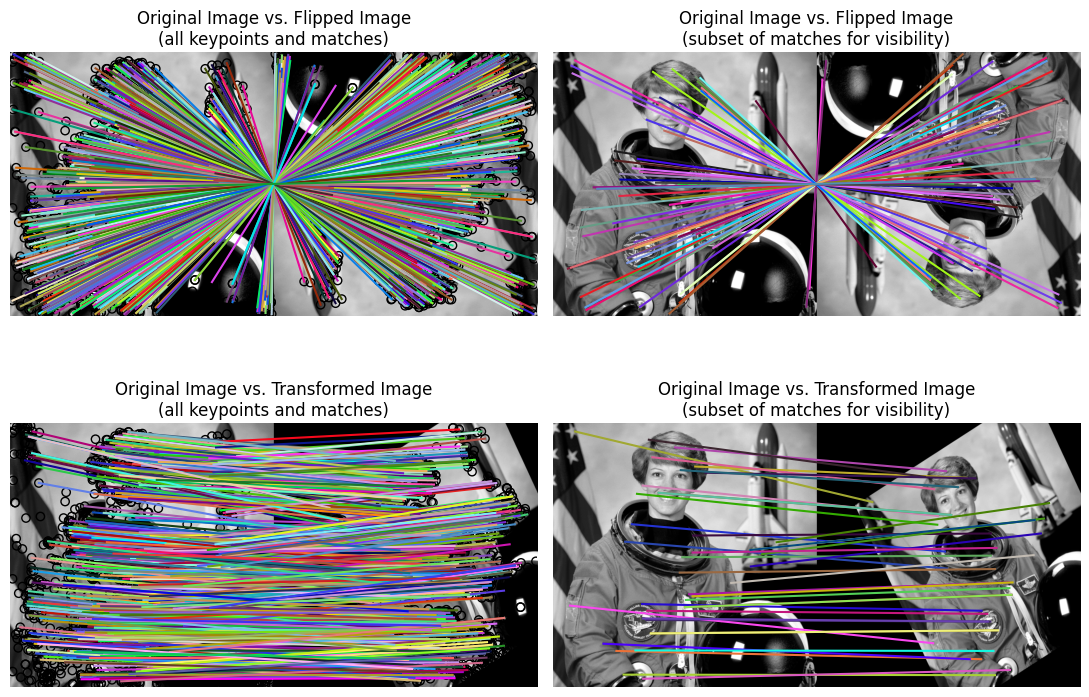

In [3]:
view_key_points()

### Extracción de características de una imagen

Durante la clase se utilizará librería `skimage` la cual cuenta con el módulo `feature`, este incluye el detector SIFT que nos servirá para extraer puntos claves y descriptores.

Puede describirse 3 pasos para la extracción de las características:
1. Detección de Puntos Clave:

    Se detectan los puntos clave en la imagen utilizando un algoritmo que busca regiones distintivas, como cambios de contraste significativos, esquinas o bordes.

2. Descripción de Región Local:

    Para cada punto clave detectado, se define una región alrededor del punto que es invariante a la escala y la rotación.

    Esta región se divide en subregiones más pequeñas, y se calculan orientaciones locales basadas en gradientes dentro de estas subregiones.

3. Generación del Descriptor:

    El descriptor SIFT se construye combinando la información de todas las subregiones alrededor del punto clave.

    Cada subregión contribuye con una parte del vector de características del descriptor final.

El descriptor resultante es un vector multidimensional que captura las características locales de textura y estructura en la vecindad del punto clave.

Acá se muestran dos ejemplos de imágenes con sus puntos característicos:
<div style="text-align:center;">
    <img src="./Samples/keypoints_lana.png" alt="Texto alternativo 1" width="600" height="auto">
    <img src="./Samples/messi_keypoints.png" alt="Texto alternativo 2" width="600" height="auto">
</div>

In [4]:
# Permite cargar archivos desde un directorio
import os

# Permite cargar una imagen en memoria desde el fichero que la define
from skimage import io

# Permite llevar una imagen a escala de grises
from skimage.color import rgb2gray

# Permite extraer las características de una imagen
from skimage.feature import match_descriptors, plot_matches, SIFT

# Permite visualizar resultados
import matplotlib.pyplot as plt

### Ejercicio #1: Implemente una función para extraer las características SIFT de una imagen.

###### Pista #1: Considere convertir la imagen a la escala de grises.
###### Pista #2: Considere utilizar alguna función propia de la clase SIFT para la detección y extracción de las características necesarias.

In [5]:
def extract_sift_features(image):
    """
    Extract SIFT features from an input image

    Parameters:
    - image (numpy.ndarray): Input image in RGB format.

    Returns:
    - keypoints (list): List of detected keypoints.
    - descriptors (numpy.ndarray): Array of size Nx128 containing descriptors for each keypoint.
    """
    # raise NotImplementedError('Ejercicio #1')

    # Convertir la imagen a escala de grises
    image = rgb2gray(image)
    
    # Crear detector SIFT
    descriptor_extractor = SIFT()
    
    # Detectar puntos clave y computar descriptores
    descriptor_extractor.detect_and_extract(image)

    return descriptor_extractor.keypoints, descriptor_extractor.descriptors

/opt/homebrew/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


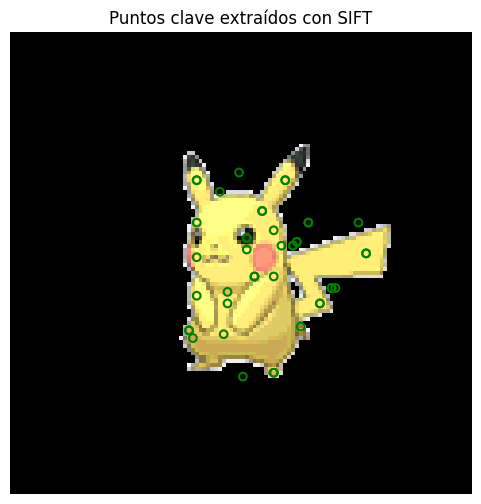

In [6]:
# Leer la imagen usando skimage
sample_image = io.imread('./Samples/sample_image.png')
sample_keypoints, sample_desciptors = extract_sift_features(sample_image)

plot_keypoints(sample_image, sample_keypoints)

### Ejercicio #2: Implemente una función para tener todos los datos en la misma representación.

###### Pista: Es posible que las imágenes tengan varios canales de colores, luego de ser cargadas en memoria. Para evitar errores futuros y puesto que solo se necesita trabajar con la escala RGB, considere utilizar la siguiente notación `arr[:, :, :3]`, donde `arr` es la imagen luego de ser cargada.

In [7]:
def process_corpus(image_paths):
    """
    Process a set of images to generate SIFT features for each

    Parameters:
    image_paths (list): List of paths to the images in the dataset.

    Returns:
    features (dict): Dictionary mapping image paths to their extracted SIFT features.
    """
    # raise NotImplementedError('Ejercicio #2')

    # Generar puntos claves y descriptores para cada imagen del corpus
    features = {}
    for image_path in image_paths:
        # Cargar imagen
        image = io.imread(image_path)[:, :, :3]
        
        # Extraer características
        current_features = extract_sift_features(image)
        
        # Representar la imagen del corpus por su ruta y sus características
        features[image_path] = current_features
        
    return features

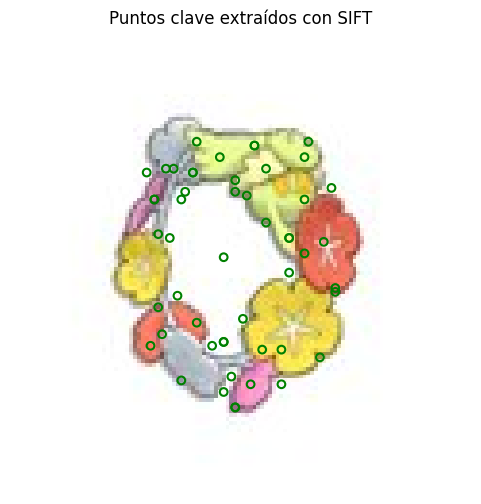

In [8]:
dataset_path = './dataset'
image_paths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path)]
dataset = process_corpus(image_paths)

# Visualización de los keypoints de la primera imagen del dataset
plot_keypoints(io.imread(image_paths[0])[:, :, :3], dataset[image_paths[0]][0])

En lo adelante, se considerará la imagen de Pikachu como consulta al sistema efectuada por el usuario.

In [9]:
# Cargar la imagen 
query_image = sample_image[:, :, :3]

print('Dimensiones de la imagen:', query_image.shape)

# Extraer características de la imagen 
query_keypoints, query_descriptors = extract_sift_features(query_image)

Dimensiones de la imagen: (120, 120, 3)


### Ejercicio #3: Defina una función para establecer la similitud entre los descriptores de dos imágenes.

Puede asumir que como imagen trabajará con el conjunto de puntos clave extraído en el primer ejercicio. 

Además, esta función tiene que devolver las coincidencias (`matches`), las cuales es un array de dimensión $(N, 2)$, donde $N$ es el número de coincidencias encontradas. Cada fila del array contiene dos índices, uno para cada conjunto de descriptores. Estos índices indican los descriptores coincidentes. Por ejemplo, si $matches[i] = [a, b]$ significa que el descriptor $a$ de $D1$ coincide con el descriptor $b$ de $D2$.

###### Pista #1: Al inicio importó la función que establece la similitud. "Esa función" permite comparar dos conjuntos de descriptores y encontrar coincidencias entre ellos.

###### Pista #2: Considere usar el parámetro `cross_check=True` de "esa función", para indicar la coincidencia en ambos sentidos, lo cual reduce el número de coincidencias erróneas.

In [10]:
def run_match_descriptors(desc1, desc2):
    """
    Compares two sets of SIFT descriptors to find matching keypoints between them.

    Parameters:
    desc1 (numpy.ndarray): First set of SIFT descriptors.
    desc2 (numpy.ndarray): Second set of SIFT descriptors.

    Returns:
    matches (list): List of matches found between the two descriptor sets.
    """
    # raise NotImplementedError('Ejercicio #3')
    
    # Usar match_descriptors para encontrar los matches
    matches = match_descriptors(
        desc1, desc2, max_ratio=0.6, cross_check=True
        )
    return matches

### Ejercicio #4: Implemente una función para encontrar las 5 imágenes que más se asemejan a la definida en la consulta.

###### Pista: Considere la cantidad de puntos coincidentes entre 2 imágenes como la cercanía entre ellas: a mayor coincidencia, más parecida son.

In [11]:
def find_most_similar_image(query_descriptors, dataset):
    """
    Finds the most similar image in the corpus to a given query image based on SIFT feature matching.
    
    Parameters:
    query_descriptors (numpy.ndarray): Query descriptor.
    dataset (dict): Dataset descriptors.

    Returns:
    similarities (dict): Dictionary with size 5 where keys are image paths and values are tuples containing keypoints and matches.
    """
    # raise NotImplementedError('Ejercicio #4')
    
    similarities = {}
    for path, (keypoints, descriptors) in dataset.items():
        matches = run_match_descriptors(query_descriptors, descriptors)
        
        # La similitud se puede definir como el número de matches
        similarities[path] = (keypoints, matches)
            
    # Ordenar por el número de matches
    similarities = sorted(similarities.items(), key=lambda x: len(x[1][1]), reverse=True)
    
    return similarities[:5]

/var/folders/nl/h18jm3y134g0g7dgmw1k8x1h0000gn/T/ipykernel_5617/1414724571.py:10: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(ax, query_image, img, query_keypoints, keypoints, matches=matches)


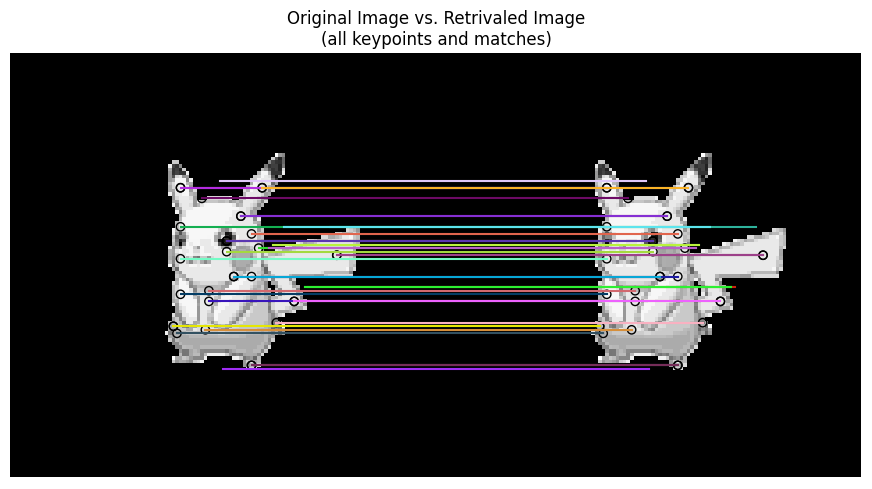

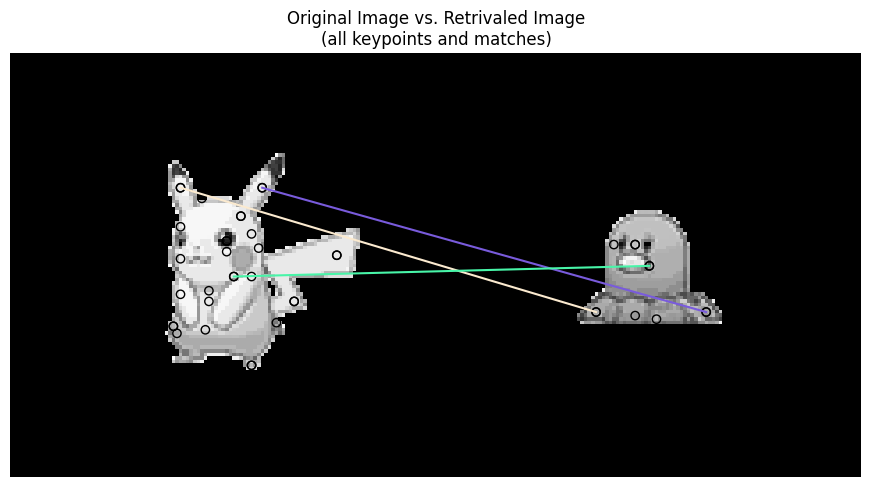

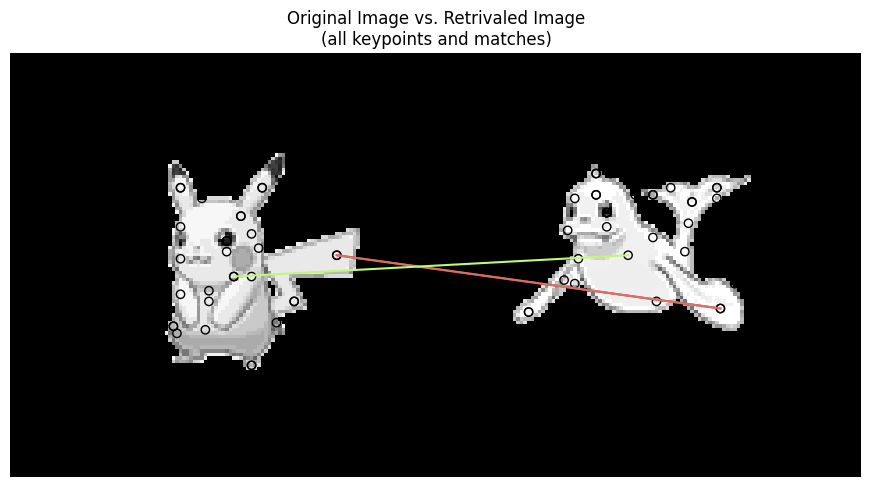

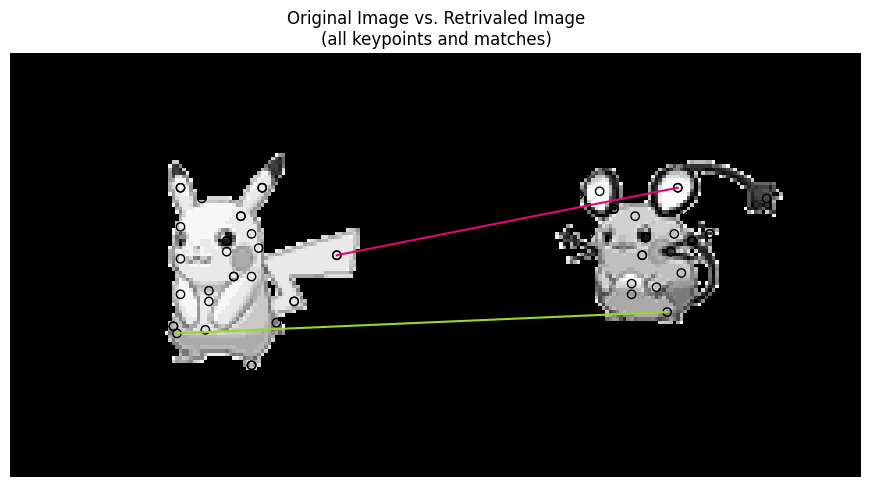

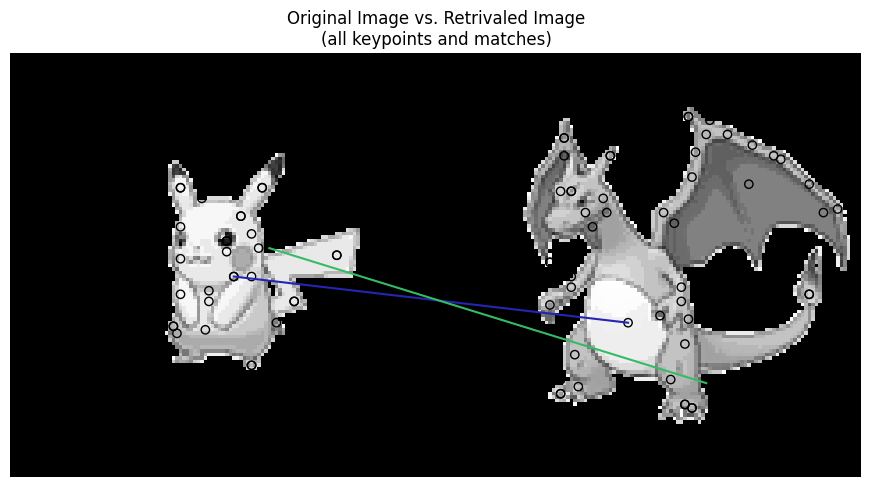

In [12]:
similarities = find_most_similar_image(query_descriptors, dataset)

query_image = rgb2gray(query_image)
for path, (keypoints, matches) in similarities:
    img = rgb2gray(io.imread(path)[:, :, :3])
    fig, ax = plt.subplots(figsize=(11, 8))

    plt.gray()

    plot_matches(ax, query_image, img, query_keypoints, keypoints, matches=matches)
    ax.axis('off')
    ax.set_title("Original Image vs. Retrivaled Image\n" "(all keypoints and matches)")